In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
from sklearn import linear_model

In [2]:
# Import and process the data
data = np.genfromtxt('data/client_performance.csv', delimiter=";", dtype=float, encoding="utf-8-sig")

training_percent = 0.5
training_set_len = math.floor(len(data) * training_percent)

# X axis is the length of time series
x = range(len(data))
x_training = range(training_set_len)

# The number of clients we have is the number of columns in the data
client_number = len(data[0])

# Average each time point to get a learning set
average_performance = [0] * len(data)
for i, row in enumerate(data):
    sum_performance = 0
    for cell in row:
        sum_performance += cell
    average_performance[i] = sum_performance / len(row)

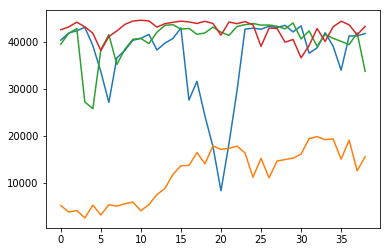

In [3]:
# Visualize on plot
fig = plt.figure()
ax = plt.axes()

for client in range(client_number):
    ax.plot(x, [i[client] for i in data])

[33788.30745208 33977.99306734 34167.67868259 34357.36429784
 34547.04991309 34736.73552835 34926.4211436  35116.10675885
 35305.7923741  35495.47798936 35685.16360461 35874.84921986
 36064.53483511 36254.22045037 36443.90606562 36633.59168087
 36823.27729612 37012.96291138 37202.64852663 37392.33414188]
[30657.866915422885, 27242.75, 30330.25, 33638.5, 36764.25, 35412.83998005982, 35133.5, 35236.75, 35961.75, 35291.75, 35480.25, 34188.25, 34639.25, 35112.5, 35701.5, 35594.75, 33384.5, 35846.5, 34312.992055610724, 33595.5]


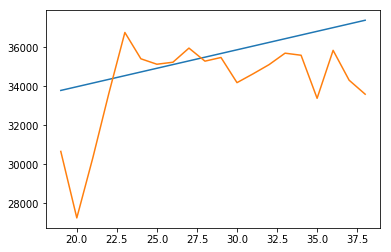

In [9]:
# Linear regression, with feature vectors being previous data point
model = linear_model.LinearRegression()
model.fit(np.reshape(x_training, (-1, 1)), average_performance[0: training_set_len])

# Validate
x_validate = x[training_set_len:]
prediction = model.predict(np.reshape(x_validate, (-1, 1)))

print(prediction)
print(average_performance[training_set_len:])

fig = plt.figure()
ax = plt.axes()

# Plot predicted
ax.plot(x_validate, prediction)

# Plot actual
ax.plot(x_validate, average_performance[training_set_len:])
